# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
#The data represents 17 marketing campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
#The objective is to determine which features are the most important in determining whether a client chooses so subscribe or not

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.feature_selection import SequentialFeatureSelector, RFE, RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
dummies = pd.get_dummies(df[['month', 'day_of_week', 'poutcome', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']], dtype='int')
df = df.join(dummies)
df = df.drop(['month', 'day_of_week', 'poutcome', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  month_apr                      41188 non-null  int32  
 12  month_aug                      41188 non-null 

In [11]:
X = df.drop(['duration', 'y'], axis=1)
y = df['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [13]:
y_test.value_counts(normalize = True)

y
no     0.888026
yes    0.111974
Name: proportion, dtype: float64

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [14]:
lr = LogisticRegression(max_iter = 1000).fit(X_train, y_train)
print("Logistic Regression Train Score:", lr.score(X_train, y_train))
print("Logistic Regression Test Score:", lr.score(X_test, y_test))

Logistic Regression Train Score: 0.9012009970541581
Logistic Regression Test Score: 0.8990968243177625


### Problem 9: Score the Model

What is the accuracy of your model?

In [15]:
acc_score = accuracy_score(y_test, lr.predict(X_test))
acc_score

0.8990968243177625

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [16]:
train_score = []
test_score = []
fit_time = []

In [17]:
#Logistic Regression Basic Model
start_time = time.time()
lr = LogisticRegression(max_iter = 1000).fit(X_train, y_train)
print("Logistic Regression Train Score:", lr.score(X_train, y_train))
print("Logistic Regression Test Score:", lr.score(X_test, y_test))
end_time = time.time()
elapsed_time = end_time - start_time
print("Fit Time:", elapsed_time)
train_score.append(lr.score(X_train, y_train))
test_score.append(lr.score(X_train, y_train))
fit_time.append(elapsed_time)

Logistic Regression Train Score: 0.9012009970541581
Logistic Regression Test Score: 0.8990968243177625
Fit Time: 0.43991565704345703


In [18]:
#KNN Basic Model
start_time = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("KNN Train Score:", knn.score(X_train, y_train))
print("KNN Test Score:",knn.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(knn.score(X_train, y_train))
test_score.append(knn.score(X_train, y_train))
fit_time.append(elapsed_time)

KNN Train Score: 0.9143763555728206
KNN Test Score: 0.8891910265125765
Fit Time: 0.029843807220458984


In [19]:
#Decision Tree Basic Model
start_time = time.time()
dt = DecisionTreeClassifier().fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("Decision Tree Train Score:", dt.score(X_train, y_train))
print("Decision Tree Test Score:",dt.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(dt.score(X_train, y_train))
test_score.append(dt.score(X_train, y_train))
fit_time.append(elapsed_time)

Decision Tree Train Score: 0.9954355637564339
Decision Tree Test Score: 0.8417014664465379
Fit Time: 0.189436674118042


In [20]:
#SVM Basic Model
start_time = time.time()
svc = SVC().fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("SVC Train Score:", svc.score(X_train, y_train))
print("SVC Test Score:",svc.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(svc.score(X_train, y_train))
test_score.append(svc.score(X_train, y_train))
fit_time.append(elapsed_time)

SVC Train Score: 0.8978343206759251
SVC Test Score: 0.8965718170340876
Fit Time: 6.7483954429626465


In [21]:
res_dict = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
           'Train Time': fit_time,
           'Train Accuracy': train_score,
           'Test Accuracy': test_score,}
results_df = pd.DataFrame(res_dict).set_index('Model')
results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.439916,0.901201,0.901201
KNN,0.029844,0.914376,0.914376
Decision Tree,0.189437,0.995436,0.995436
SVM,6.748395,0.897834,0.897834


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [22]:
data = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
dummies = pd.get_dummies(data[['month', 'day_of_week', 'poutcome', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']], dtype='int')
data = data.join(dummies)
#drop the features that aren't necessary anymore
data = data.drop(['month', 'day_of_week', 'poutcome', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact'], axis=1)
#obtain the features that will be used for training/testing
data = data[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'month_oct', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_success', 'job_admin.', 'job_blue-collar', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_technician',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_unknown',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone']]

In [23]:
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 42)

In [24]:
model_list = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
train_score = []
test_score = []
fit_time = []

In [25]:
#Logistic Regression
start_time = time.time()
pipeline = Pipeline([('scale', StandardScaler()),
                 ('lgr', LogisticRegression(multi_class='multinomial', max_iter=1000, 
                                            C = 0.1, penalty = 'l1', solver = 'saga'))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("Logistic Regression Train Score:", pipeline.score(X_train, y_train))
print("Logistic Regression Test Score:", pipeline.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(pipeline.score(X_train, y_train))
test_score.append(pipeline.score(X_train, y_train))
fit_time.append(elapsed_time)

Logistic Regression Train Score: 0.9002427921092564
Logistic Regression Test Score: 0.8964554503520272
Fit Time: 0.6550543308258057


In [26]:
#KNN
start_time = time.time()
knn_pipe = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=19, leaf_size = 5, 
                                                     p = 2, weights = 'uniform'))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("KNN Train Score:", knn_pipe.score(X_train, y_train))
print("KNN Test Score:",knn_pipe.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(knn_pipe.score(X_train, y_train))
test_score.append(knn_pipe.score(X_train, y_train))
fit_time.append(elapsed_time)

KNN Train Score: 0.9013050075872534
KNN Test Score: 0.8945132313668366
Fit Time: 0.04500150680541992


In [27]:
#Decision Tree
start_time = time.time()
tree_depth = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, 
                                    min_samples_split = 5, min_samples_leaf = 1).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("Decision Tree Train Score:", tree_depth.score(X_train, y_train))
print("Decision Tree Test Score:", tree_depth.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(tree_depth.score(X_train, y_train))
test_score.append(tree_depth.score(X_train, y_train))
fit_time.append(elapsed_time)

Decision Tree Train Score: 0.9052200303490137
Decision Tree Test Score: 0.898154891964069
Fit Time: 0.07657146453857422


In [28]:
#SVC
start_time = time.time()
svc = SVC(C = 0.1, kernel='poly', gamma = 'scale').fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("SVC Train Score:", svc.score(X_train, y_train))
print("SVC Test Score:",svc.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(svc.score(X_train, y_train))
test_score.append(svc.score(X_train, y_train))
fit_time.append(elapsed_time)

SVC Train Score: 0.8982094081942337
SVC Test Score: 0.8947560087399854
Fit Time: 5.536633014678955


In [29]:
res_dict = {'Model': model_list,
           'Train Time': fit_time,
           'Train Accuracy': train_score,
           'Test Accuracy': test_score,}
results_df = pd.DataFrame(res_dict).set_index('Model')
results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.655054,0.900243,0.900243
KNN,0.045002,0.901305,0.901305
Decision Tree,0.076571,0.905220,0.905220
SVM,5.536633,0.898209,0.898209


C:\Users\Andrew Tseng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0, 0.5, 'Time (seconds)')

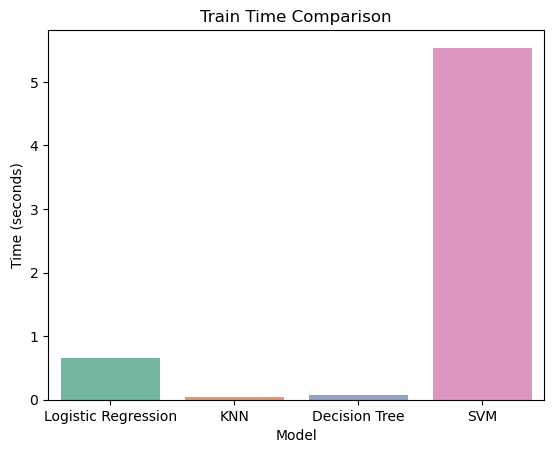

In [30]:
#display the comparison of fit time
colors = sns.color_palette("Set2", len(model_list))
sns.barplot(x=model_list, y=fit_time, palette=colors)
plt.title('Train Time Comparison')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')

C:\Users\Andrew Tseng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0, 0.5, 'Score')

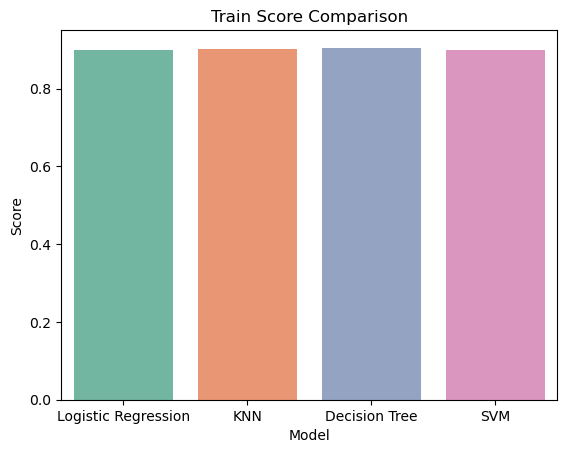

In [31]:
#display the differences in train score
colors = sns.color_palette("Set2", len(model_list))
sns.barplot(x=model_list, y=train_score, palette=colors)
plt.title('Train Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')

C:\Users\Andrew Tseng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0, 0.5, 'Score')

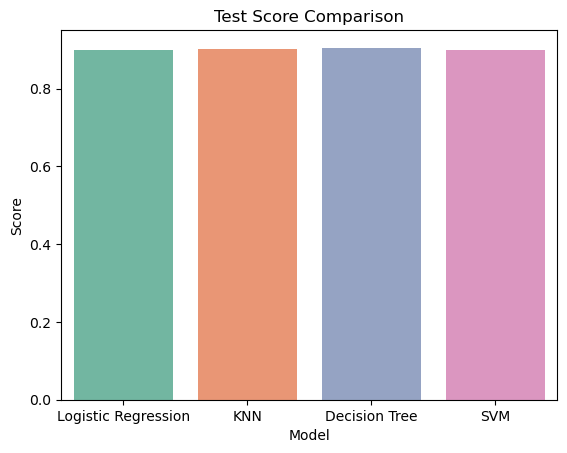

In [32]:
#display the differences in test score
colors = sns.color_palette("Set2", len(model_list))
sns.barplot(x=model_list, y=test_score, palette=colors)
plt.title('Test Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')

In [33]:
#model = RandomForestClassifier()
#rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
#rfecv.fit(X_train, y_train)

#optimal_num_features = rfecv.n_features_
#print(f"Optimal number of features: {optimal_num_features}")

#ranking = rfecv.ranking_

#support = rfecv.support_

#best_features = X_train.columns[support]
#print("Best Features:", best_features)

In [34]:
#FEATURES TO USE FOR NUMERICAL DATASET (length of list = 41)
#features_list = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
#       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
#       'month_oct', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
#       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
#       'poutcome_success', 'job_admin.', 'job_blue-collar', 'job_management',
#       'job_retired', 'job_self-employed', 'job_services', 'job_technician',
#       'marital_divorced', 'marital_married', 'marital_single',
#       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
#       'education_high.school', 'education_professional.course',
#       'education_university.degree', 'default_no', 'default_unknown',
#       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
#       'contact_telephone']

In [35]:
#DT Improved Model
#criterion = 'entropy'
#max depth = 6
#min_samples_split = 5
#min_samples_leaf = 1

In [36]:
#KNN Improved Model
#set number of neighbors = 19 -> KNeighborsClassifier(n_neighbors=19)
#leaf size = 5
#p = 2
#weights = 'uniform'

In [37]:
#Logistic Regresssion Improved Model
#C = 0.1
#penalty = 'l1'
#solver = 'saga'

##### Questions